In [1]:
import pandas as pd
import numpy as np

Carregar dataset

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


É necessário verificar se existe algum campo vazio, ou seja, NA.

In [3]:
df.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

Verificar tipos dos campos

In [4]:
df.dtypes

Month                      object
Thousands of Passengers     int64
dtype: object

O dataset parece estar ordenado por data, ou seja, é uma série temporal, e não possúi campos vazios. Nesse caso, indexar a série a data. Para isso, é necessário primeiro converter o campo "Month", referente a data, em formato DATETIME.

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month                      datetime64[ns]
Thousands of Passengers             int64
dtype: object

In [6]:
df.set_index('Month', inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Agora é necessário informar a frequência dos dados da série temporal. Os dados são mensais, então, vou usar a frequência 'MS', referente a dados mensais.

In [8]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [9]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [17]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

In [20]:
test_predictions = fitted_model.forecast(36)

In [21]:
test_predictions

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379218
1958-07-01    502.248556
1958-08-01    490.986946
1958-09-01    424.051080
1958-10-01    365.391637
1958-11-01    318.392248
1958-12-01    360.320761
1959-01-01    369.905596
1959-02-01    359.903247
1959-03-01    422.128281
1959-04-01    412.508718
1959-05-01    421.370056
1959-06-01    492.003333
1959-07-01    545.035930
1959-08-01    532.814925
1959-09-01    460.176683
1959-10-01    396.519947
1959-11-01    345.516603
1959-12-01    391.017074
1960-01-01    401.418457
1960-02-01    390.563992
1960-03-01    458.090078
1960-04-01    447.651009
1960-05-01    457.267258
1960-06-01    533.917900
1960-07-01    591.468430
1960-08-01    578.206298
1960-09-01    499.379886
1960-10-01    430.300129
1960-11-01    374.951726
1960-12-01    424.328457
1961-01-01    435.615951
Freq: MS, dtype: float64

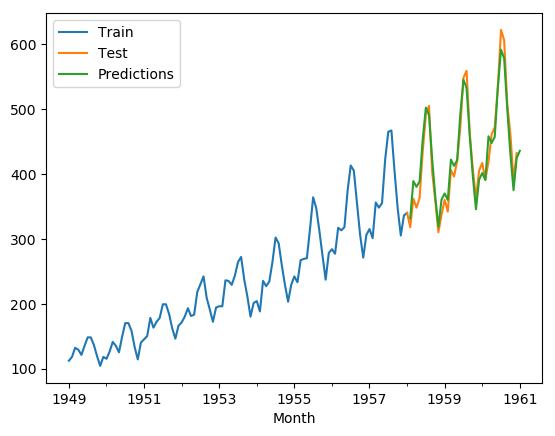

In [23]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train')
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions')

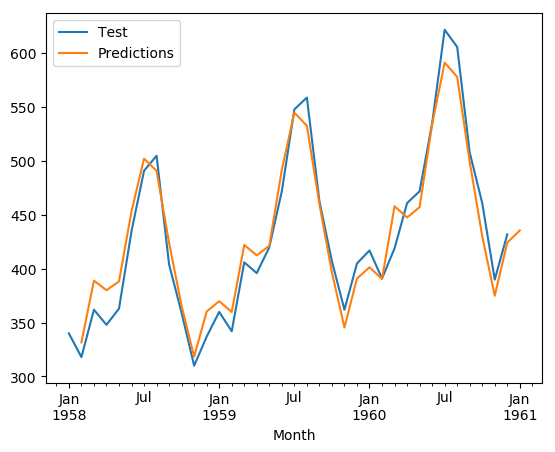

In [24]:
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_predictions.plot(legend=True, label='Predictions')

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [28]:
mean_absolute_error(test_data, test_predictions)

46.30290458016069

In [27]:
mean_squared_error(test_data, test_predictions)

3075.328467280274

In [30]:
np.sqrt(mean_squared_error(test_data, test_predictions))

55.455644142686445

Considerando que as métricas não quadradas (ou seja, mean absolute error e a raiz da mean squared error) não apresentaram valores maiores que o desvio padrão da base de dados original, podemos dizer que o modelo tem uma capacidade preditiva interessante.

In [31]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [32]:
forecast_predictions = final_model.forecast(36)

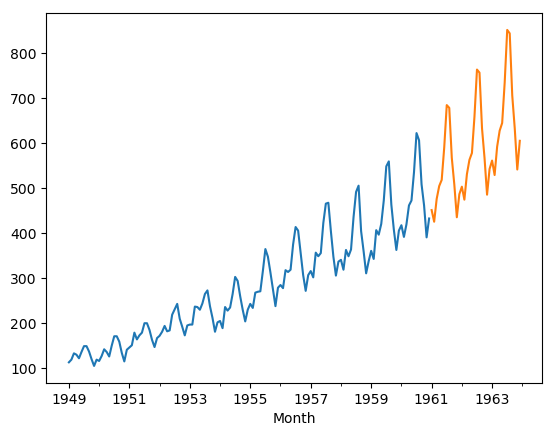

In [33]:
df['Thousands of Passengers'].plot()
forecast_predictions.plot()

Foi possível prever a série. Porém, a mesma não é estacionária, e provavelmente por isso estamos usando modelos de exponential smoothing.

In [34]:
df2 = pd.read_csv('../Data/samples.csv', index_col=0, parse_dates=True)

In [35]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


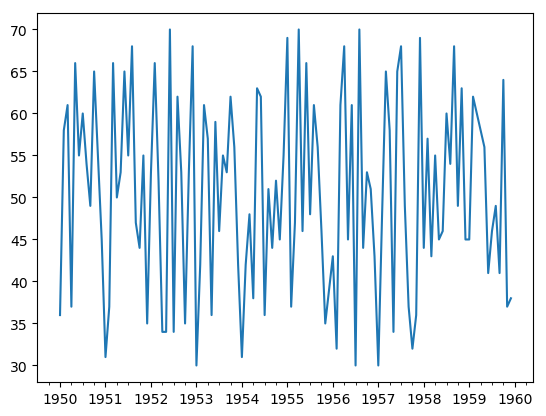

In [36]:
df2['a'].plot()

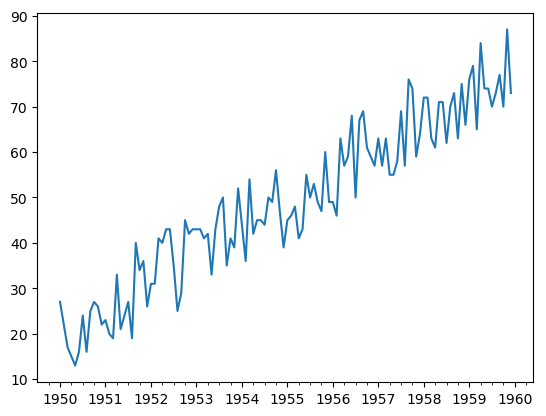

In [37]:
df2['b'].plot()